<a href="https://githubtocolab.com/Astolfo2332/Biosenales_el_regreso/blob/main/Proyecto_3_los_4GB.ipynb"
    target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" /></a>

# Proyecto 3

4 GB de audio no es nada

## Descarga de Kaggel

Aqui mete el json de kaggle

In [20]:
from google.colab import files

files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!mkdir - p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json'  # Para proteger la información


In [ ]:
!kaggle datasets download -d vbookshelf/respiratory-sound-database
! unzip respiratory-sound-database.zip


La mousque herramienta misteriosa

In [ ]:
!wget https://raw.githubusercontent.com/Astolfo2332/Biosenales_el_regreso/main/special_fun.py


# 1 El análisis

In [14]:
import os
import winsound
import special_fun as s
import numpy as np


In [5]:
#Para que me avise
duration = 1000 
freq = 440 

## 1.1 Carga

In [6]:
ruta_carpeta = './Data/audio_and_txt_files'
#Si es en colab
#ruta_carpeta = "/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files" 
lista_archivos = os.listdir(ruta_carpeta)
datos_sano,datos_crepitancia,datos_silbancia=s.el_discriminador(lista_archivos,ruta_carpeta)

In [7]:
print("Pacientes con ciclos sanos: ",len(datos_sano))
print("Pacientes con ciclos silbancias: ",len(datos_crepitancia))
print("Pacientes con ciclos crepitancias: ",len(datos_silbancia))

Pacientes con ciclos sanos:  714
Pacientes con ciclos silbancias:  499
Pacientes con ciclos crepitancias:  336


## Obtención de los audios

In [8]:
datos=s.sonido_probando123(lista_archivos,ruta_carpeta)

# Generación de espectros

In [10]:
sano_list,crackles_list,wheezes_list,sano_welch_list, crackles_welch_list,wheezes_welch_list=s.el_discriminador_2(datos,datos_sano,datos_crepitancia,datos_silbancia,[2000,1000])
winsound.Beep(freq, duration)

In [11]:
promedios=s.el_promediador(sano_welch_list, crackles_welch_list,wheezes_welch_list)

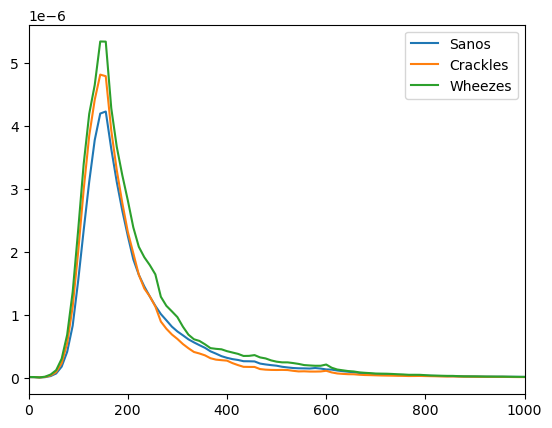

In [20]:
a=s.grafiquelo(promedios,[0,1000])

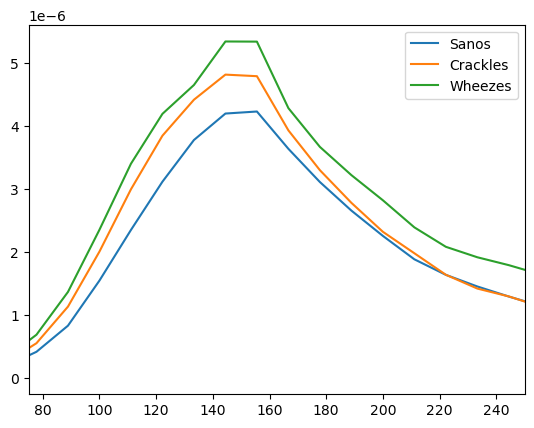

In [21]:
b=s.grafiquelo(promedios,[75,250])

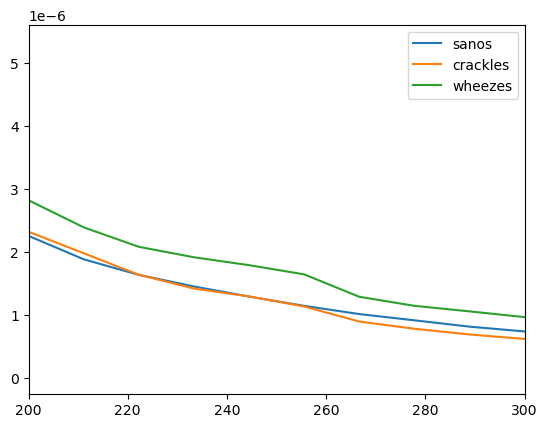

In [ ]:
b=s.grafiquelo(promedios,[200,300])

In [ ]:
df=pd.DataFrame( np.array(promedios))
df.to_csv("promedios.csv",index=False)

In [ ]:
#!wget https://raw.githubusercontent.com/Astolfo2332/Biosenales_el_regreso/main/promedios.cvs

In [ ]:
prom= np.loadtxt('promedios.csv', delimiter=',')
prom=prom[1:]

## Rangos de comparación para la PSD

- Rango de los 3: 75 a 250 Hz
- Rango de silbancia y sanos-crepitancia 200-300 Hz

In [22]:
d=s.el_finalizador([sano_welch_list, crackles_welch_list,wheezes_welch_list],[sano_list,crackles_list,wheezes_list],75,250)

In [23]:
d

,Estado,Sumatoria,Mediana,Varianza
0,Healthy,5.989646e-09,5.119604e-10,0.000003
1,Healthy,4.860721e-09,4.286595e-10,0.000003
2,Healthy,7.108037e-09,3.301289e-10,0.000003
3,Healthy,6.155510e-09,2.589782e-10,0.000003
4,Healthy,5.133065e-09,2.761323e-10,0.000003
...,...,...,...,...
7399,Wheezes,1.215835e-08,1.924497e-08,0.000061
7400,Wheezes,3.507225e-08,1.509765e-08,0.000068
7401,Wheezes,6.489807e-09,4.453202e-10,0.000006
7402,Wheezes,2.813206e-09,3.248346e-10,0.000005


In [24]:
d.to_csv("DataSet_75_250.csv",index=False)

In [25]:
d2=s.el_finalizador([sano_welch_list, crackles_welch_list,wheezes_welch_list],[sano_list,crackles_list,wheezes_list],200,300)

In [26]:
d2

,Estado,Sumatoria,Mediana,Varianza
0,Healthy,2.083966e-07,5.119604e-10,0.000003
1,Healthy,1.765406e-07,4.286595e-10,0.000003
2,Healthy,1.837974e-07,3.301289e-10,0.000003
3,Healthy,2.026471e-07,2.589782e-10,0.000003
4,Healthy,1.501390e-07,2.761323e-10,0.000003
...,...,...,...,...
7399,Wheezes,3.656316e-06,1.924497e-08,0.000061
7400,Wheezes,4.062062e-06,1.509765e-08,0.000068
7401,Wheezes,4.019875e-07,4.453202e-10,0.000006
7402,Wheezes,3.870462e-07,3.248346e-10,0.000005


In [27]:
d2.to_csv("DataSet_250_300.csv",index=False)